<a href="https://colab.research.google.com/github/vedangi2610/FHE-project-/blob/master/tweetpreprocess.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [2]:
import pandas as pd

In [3]:
# using the politics dataset from github
url = 'https://raw.githubusercontent.com/vedangi2610/FHE-project-/master/data_collection/old_datacollection_code/politics.csv'
tweet_df = pd.read_csv(url)

In [4]:
tweet_df.head()

,id,username,created_at,text,likes,retweeted
0,1352944690606141440,narendramodi,2021-01-23 11:42:05,India marks #ParakramDivas and pays homage to ...,13106,3256
1,1352879101112152064,narendramodi,2021-01-23 07:21:27,On the way to Kolkata to mark #ParakarmDivas a...,41190,7855
2,1352878844588535808,narendramodi,2021-01-23 07:20:26,"सबका साथ सबका विकास, सबका विश्वास के मंत्र पर ...",6941,1995
3,1352878695728500736,narendramodi,2021-01-23 07:19:50,We are working towards Assam’s development bas...,7517,2020
4,1352878393646264320,narendramodi,2021-01-23 07:18:38,"To build an Aatmanirbhar Bharat, we have to fo...",12064,2762


In [5]:
#adding a new column for cleaned tweets
tweet_df.insert(4, "cleaned_tweets", tweet_df['text'], True)
tweet_df.head()

,id,username,created_at,text,cleaned_tweets,likes,retweeted
0,1352944690606141440,narendramodi,2021-01-23 11:42:05,India marks #ParakramDivas and pays homage to ...,India marks #ParakramDivas and pays homage to ...,13106,3256
1,1352879101112152064,narendramodi,2021-01-23 07:21:27,On the way to Kolkata to mark #ParakarmDivas a...,On the way to Kolkata to mark #ParakarmDivas a...,41190,7855
2,1352878844588535808,narendramodi,2021-01-23 07:20:26,"सबका साथ सबका विकास, सबका विश्वास के मंत्र पर ...","सबका साथ सबका विकास, सबका विश्वास के मंत्र पर ...",6941,1995
3,1352878695728500736,narendramodi,2021-01-23 07:19:50,We are working towards Assam’s development bas...,We are working towards Assam’s development bas...,7517,2020
4,1352878393646264320,narendramodi,2021-01-23 07:18:38,"To build an Aatmanirbhar Bharat, we have to fo...","To build an Aatmanirbhar Bharat, we have to fo...",12064,2762


In [6]:
# changing to lower case 
tweet_df['cleaned_tweets'] = tweet_df.cleaned_tweets.str.lower()
tweet_df.head()

,id,username,created_at,text,cleaned_tweets,likes,retweeted
0,1352944690606141440,narendramodi,2021-01-23 11:42:05,India marks #ParakramDivas and pays homage to ...,india marks #parakramdivas and pays homage to ...,13106,3256
1,1352879101112152064,narendramodi,2021-01-23 07:21:27,On the way to Kolkata to mark #ParakarmDivas a...,on the way to kolkata to mark #parakarmdivas a...,41190,7855
2,1352878844588535808,narendramodi,2021-01-23 07:20:26,"सबका साथ सबका विकास, सबका विश्वास के मंत्र पर ...","सबका साथ सबका विकास, सबका विश्वास के मंत्र पर ...",6941,1995
3,1352878695728500736,narendramodi,2021-01-23 07:19:50,We are working towards Assam’s development bas...,we are working towards assam’s development bas...,7517,2020
4,1352878393646264320,narendramodi,2021-01-23 07:18:38,"To build an Aatmanirbhar Bharat, we have to fo...","to build an aatmanirbhar bharat, we have to fo...",12064,2762


In [7]:
# removing url links
import re #(regex library for regular expressions)

# for urls with http or https
tweet_df.cleaned_tweets = tweet_df.cleaned_tweets.apply(lambda x: re.sub(r'https?:\/\/\S+', '', x))

#for urls with or without www
tweet_df.cleaned_tweets.apply(lambda x: re.sub(r"www\.[a-z]?\.?(com)+|[a-z]+\.(com)", '', x))

0      india marks #parakramdivas and pays homage to ...
1      on the way to kolkata to mark #parakarmdivas a...
2      सबका साथ सबका विकास, सबका विश्वास के मंत्र पर ...
3      we are working towards assam’s development bas...
4      to build an aatmanirbhar bharat, we have to fo...
5      distribution of land pattas/allotment certific...
6      addressing a public meeting in sivasagar in as...
7      the honour is ours, president @jairbolsonaro t...
8      tributes to shri balasaheb thackeray ji on his...
9      महान स्वतंत्रता सेनानी और भारत माता के सच्चे स...
10     dear sisters and brothers of west bengal, \r\n...
11     পশ্চিম বঙ্গের প্রিয় ভাই ও বোনেরা,\r\n\r\nপরাক...
12     tomorrow morning i would be among the people o...
13     কাইলৈ পুৱা মই অসমৰ জনসাধাৰণৰ মাজত থাকিম। শিৱসা...
14     may the thoughts and ideals of netaji subhas c...
15     i can never forget the affection of the people...
16     on the eve of netaji bose’s jayanti, my mind g...
17     haripura has a special r

In [8]:
# remove @mention
tweet_df.cleaned_tweets = tweet_df.cleaned_tweets.apply(lambda x: re.sub(r'@mention', '', x))
tweet_df.head()

,id,username,created_at,text,cleaned_tweets,likes,retweeted
0,1352944690606141440,narendramodi,2021-01-23 11:42:05,India marks #ParakramDivas and pays homage to ...,india marks #parakramdivas and pays homage to ...,13106,3256
1,1352879101112152064,narendramodi,2021-01-23 07:21:27,On the way to Kolkata to mark #ParakarmDivas a...,on the way to kolkata to mark #parakarmdivas a...,41190,7855
2,1352878844588535808,narendramodi,2021-01-23 07:20:26,"सबका साथ सबका विकास, सबका विश्वास के मंत्र पर ...","सबका साथ सबका विकास, सबका विश्वास के मंत्र पर ...",6941,1995
3,1352878695728500736,narendramodi,2021-01-23 07:19:50,We are working towards Assam’s development bas...,we are working towards assam’s development bas...,7517,2020
4,1352878393646264320,narendramodi,2021-01-23 07:18:38,"To build an Aatmanirbhar Bharat, we have to fo...","to build an aatmanirbhar bharat, we have to fo...",12064,2762


In [9]:
# removing html tags that get embedded in tweets during extraction
tweet_df.cleaned_tweets= tweet_df.cleaned_tweets.apply(lambda x: re.sub(r'&[a-z]+;', '', x))

In [10]:
# removing digits
tweet_df.cleaned_tweets = tweet_df.cleaned_tweets.astype(str).str.replace('\d+', '')

In [11]:
# remove all remaining characters that aren't letters, white space, or 
# the following #:)(/\='] that are used in emojis or hashtags
tweet_df.cleaned_tweets = tweet_df.cleaned_tweets.apply(lambda x: re.sub(r"[^a-z\s\(\-:\)\\\/\];='#]", '', x))
tweet_df.cleaned_tweets.head()

0    india marks #parakramdivas and pays homage to ...
1    on the way to kolkata to mark #parakarmdivas a...
2                                                     
3    we are working towards assams development base...
4    to build an aatmanirbhar bharat we have to foc...
Name: cleaned_tweets, dtype: object

In [16]:
# removing stopwords, digits, punctuations using NLTK (will also be used later to tokenize tweets)
import nltk
from nltk.corpus import stopwords
nltk.download('stopwords')

[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\User\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


True

In [17]:
# remove stopwords
additional_words  = ['rt','rts','retweet'] #other words to remove
stop_words = set().union(stopwords.words('english'), additional_words)
tweet_df['cleaned_tweets'] = tweet_df['cleaned_tweets'].apply(lambda x: ' '.join([word for word in x.split() if word not in (stop_words)]))

tweet_df.cleaned_tweets.head()

0    india marks #parakramdivas pays homage netaji ...
1    way kolkata mark #parakarmdivas pay tributes n...
2                                                     
3    working towards assams development based requi...
4    build aatmanirbhar bharat focus rapid developm...
Name: cleaned_tweets, dtype: object

In [18]:
# viewing the tweets and the cleaned tweets
tweet_df[['text', 'cleaned_tweets']]

,text,cleaned_tweets
0,India marks #ParakramDivas and pays homage to ...,india marks #parakramdivas pays homage netaji ...
1,On the way to Kolkata to mark #ParakarmDivas a...,way kolkata mark #parakarmdivas pay tributes n...
2,"सबका साथ सबका विकास, सबका विश्वास के मंत्र पर ...",
3,We are working towards Assam’s development bas...,working towards assams development based requi...
4,"To build an Aatmanirbhar Bharat, we have to fo...",build aatmanirbhar bharat focus rapid developm...
5,Distribution of land pattas/allotment certific...,distribution land pattas/allotment certificate...
6,Addressing a public meeting in Sivasagar in As...,addressing public meeting sivasagar assam
7,"The honour is ours, President @jairbolsonaro t...",honour president jairbolsonaro trusted partner...
8,Tributes to Shri Balasaheb Thackeray Ji on his...,tributes shri balasaheb thackeray ji jayanti u...
9,महान स्वतंत्रता सेनानी और भारत माता के सच्चे स...,- -


In [19]:
# word cloud to visualise most common words (doing this just to see if we can get good words for vocab)
!pip install wordcloud
!pip install matplotlib
from wordcloud import  WordCloud
import matplotlib.pyplot as plt



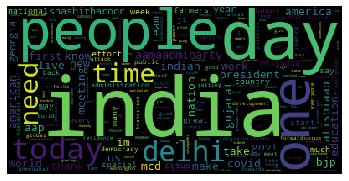

In [20]:
words = tweet_df['cleaned_tweets'].values 

wordcloud = WordCloud().generate(str(words))

plt.imshow(wordcloud)
plt.axis("off")
plt.show()